## Import libraries ##

In [1]:
import numpy as np
import pickle
from skimage.feature import hog
import glob
from matplotlib import image as mpimg
import cv2
from sklearn.svm import SVC
import sys
sys.path.insert(0 , 'C:\\Users\\lenovo\\OneDrive\\Desktop\\Hdy_3sahn_T3dy')
from Preprocessing import preprocessing as pp

## Test HOG Parameters ##

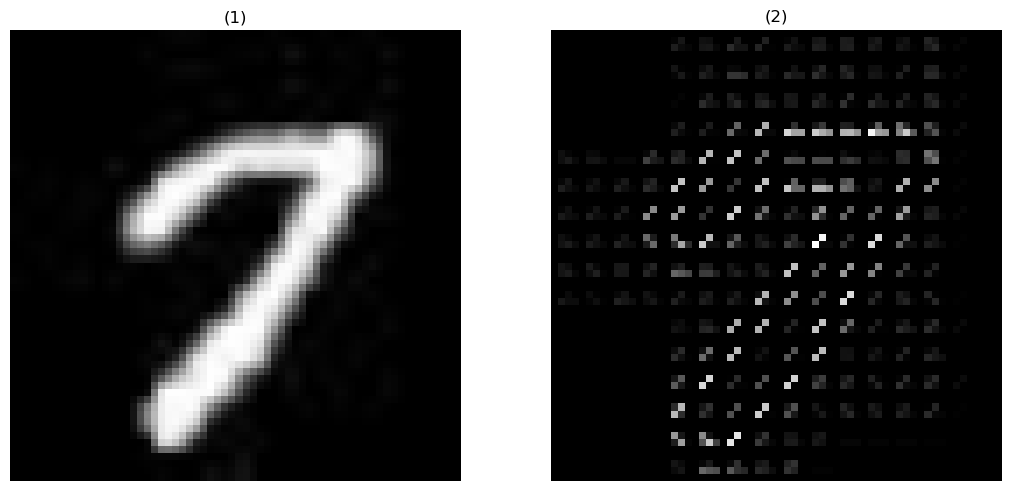

In [6]:
test_img = mpimg.imread('../speed_classification/numbers_dataset/training_set/number_7/7 (27).jpg')
resized_img = cv2.resize(test_img , (64 , 64))
feature_vector , image_feature_vector = hog(resized_img , visualize = True , pixels_per_cell = (4,4) , cells_per_block = (4,4) , transform_sqrt = True)
pp.show_images([resized_img , image_feature_vector])

## Initialization ##

In [3]:
numbers = ['1' , '2' , '3' , '4' , '5' , '6' , '7', '8' , '9']
numbers_feature_vector = {number : [] for number in numbers}
training_dataset_labels = []

## Prepare training dataset ##

In [4]:
for number in numbers:
    numbers_folder = f'C:\\Users\\lenovo\\OneDrive\\Desktop\\Hdy_3sahn_T3dy\\speed_classification\\numbers_dataset\\training_set\\number_{number}/'
    for speed_img in glob.glob(f'{numbers_folder}*.jpg'):
        img = np.array(mpimg.imread(speed_img))
        resized_img = cv2.resize(img, (64, 64))
        feature_vector, _ = hog(resized_img, visualize = True , pixels_per_cell = (4,4) , cells_per_block = (4 , 4) , transform_sqrt = True)
        numbers_feature_vector[number].append(feature_vector)
        training_dataset_labels.append(number)
training_dataset = [feature for numbers_list in numbers_feature_vector.values() for feature in numbers_list]
print(len(training_dataset) , len(training_dataset_labels))

7200 7200


## Train SVM model ##

In [5]:
svm = SVC(kernel = "rbf" , random_state = 0)
svm.fit(training_dataset , training_dataset_labels)
with open('trained_model.pk1' , 'wb') as file:
    pickle.dump(svm , file)

## Predict a single value ##

In [8]:
img_to_predict = np.array(mpimg.imread('C:\\Users\\lenovo\\OneDrive\\Desktop\\Hdy_3sahn_T3dy\\speed_classification\\numbers_dataset\\training_set\\number_1\\1 (1).jpg'))
resized_img = cv2.resize(img_to_predict , (64 , 64))
feature_vector , _ = hog(resized_img , visualize = True, pixels_per_cell = (4 , 4) , cells_per_block = (4 , 4) , transform_sqrt = True)
with open('trained_model.pk1' , 'rb') as file:
    svm_trained_model = pickle.load(file)
svm_single_prediction = svm_trained_model.predict([feature_vector])
print(svm_single_prediction)

['1']
